In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew
from xgboost import XGBRegressor


In [2]:
df_train = pd.read_csv('C:/Users/vinay/Desktop/Flip Robo Projects/Project-Housing/Project-Housing_splitted/train.csv')
df_test = pd.read_csv('C:/Users/vinay/Desktop/Flip Robo Projects/Project-Housing/Project-Housing_splitted/test.csv')

In [3]:
df_train.head() , df_test.head()

(    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0  127         120       RL          NaN     4928   Pave   NaN      IR1   
 1  889          20       RL         95.0    15865   Pave   NaN      IR1   
 2  793          60       RL         92.0     9920   Pave   NaN      IR1   
 3  110          20       RL        105.0    11751   Pave   NaN      IR1   
 4  422          20       RL          NaN    16635   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
 0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
 1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
 2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
 3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
 4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
 
   MoSold YrSold  SaleType  SaleCondition  SalePrice  
 0      2   2007        WD   

In [4]:
df_train.info(),df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

(None, None)

In [5]:
df_train.describe(),df_test.describe()

(                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
 count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
 mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
 std     416.159877    41.940650     24.82875    8957.442311     1.390153   
 min       1.000000    20.000000     21.00000    1300.000000     1.000000   
 25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
 50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
 75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
 max    1460.000000   190.000000    313.00000  164660.000000    10.000000   
 
        OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
 count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
 mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
 std       1.124343    30.145255     20.785185   182.595606   

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

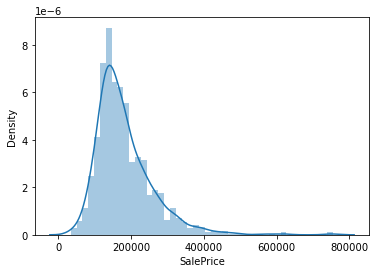

In [6]:
sns.distplot(df_train['SalePrice'])

In [7]:
corr = df_train.corr()
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.474346
MasVnrArea       0.466386
Fireplaces       0.459611
BsmtFinSF1       0.362874
LotFrontage      0.341294
OpenPorchSF      0.339500
2ndFlrSF         0.330386
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
Id              -0.023897
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePr

In [8]:
y = df_train['SalePrice']
test_id = df_test['Id']
all_df = pd.concat([df_train,df_test], axis=0, sort= False)
all_df.drop(['Id', 'SalePrice'], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal
1,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,...,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal
2,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
3,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal
4,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [9]:
Total = all_df.isnull().sum().sort_values(ascending= False)
missing_data = pd.concat([Total], axis=1 ,keys=['Total'])
missing_data.head(30)

,Total
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
SalePrice,292
LotFrontage,259
GarageQual,81
GarageCond,81
GarageType,81


In [10]:
all_df.drop((missing_data[missing_data['Total'] > 5]).index, axis = 1, inplace = True)
all_df.isnull().sum().max()

1

In [11]:
total = all_df.isnull().sum().sort_values(ascending = False)
total.head(30)

Electrical       1
SaleCondition    0
OverallQual      0
BsmtFinSF2       0
BsmtFinSF1       0
Foundation       0
ExterCond        0
ExterQual        0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
HouseStyle       0
TotalBsmtSF      0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning         0
MSSubClass       0
dtype: int64

In [12]:
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']
for feature in numeric_missed:
    all_df[feature] = all_df[feature].fillna(0)

In [13]:
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']
for feature in categorical_missed:
    all_df[feature] = all_df[feature].fillna(all_df[feature].mode()[0])

In [14]:
all_df['Functional'] = all_df['Functional'].fillna('Typ')

In [15]:
all_df.drop(['Utilities'], axis = 1, inplace = True)

In [16]:
all_df.isnull().sum().max()


0

In [17]:
all_df = pd.get_dummies(all_df)

all_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,127,120,4928,6,5,1976,1976,120,0,958,...,0,0,0,1,0,0,0,0,1,0
1,889,20,15865,8,6,1970,1970,351,823,1043,...,0,0,0,1,0,0,0,0,1,0
2,793,60,9920,7,5,1996,1997,862,0,255,...,0,0,0,1,0,0,0,0,1,0
3,110,20,11751,6,6,1977,1977,705,0,1139,...,0,0,0,0,0,0,0,0,1,0
4,422,20,16635,6,7,1977,2000,1246,0,356,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,10206,8,5,2007,2007,33,0,1530,...,0,0,0,1,0,0,0,0,1,0
288,1048,20,9245,5,5,1994,1995,686,0,304,...,0,0,0,1,0,0,0,0,1,0
289,17,20,11241,6,7,1970,1970,578,0,426,...,0,0,0,1,0,0,0,0,1,0
290,523,50,5000,6,7,1947,1950,399,0,605,...,0,0,0,1,0,0,0,0,1,0


In [18]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
all_scaled = pd.DataFrame(Scaler.fit_transform(all_df))

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_scaled,y, test_size = 0.3, random_state = 20) 

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(817, 219)
(817,)
(351, 219)
(351,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [27]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
reg.score(x_test,y_test)

-1.1132965531642291e+26

In [29]:
rdg = Ridge(alpha = 0.7, normalize = True)
rdg.fit(x_train,y_train)

Ridge(alpha=0.7, normalize=True)

In [30]:
rdg.score(x_test,y_test)

-101.14077263061193

In [31]:
eln = ElasticNet(random_state = 3)
eln.fit(x_train,y_train)

ElasticNet(random_state=3)

In [32]:
eln.score(x_test,y_test)

0.751477342762551

In [34]:
y_pred_reg = pd.DataFrame(reg.predict(all_scaled))
y_pred = pd.DataFrame()
y_pred['SalePrice'] = y_pred_reg[0]
y_pred['Id'] = df_test['Id']
y_pred.to_csv('attempt1.cvs', index = False)

In [35]:
y_pred_rdg = pd.DataFrame(rdg.predict(all_scaled))
y1_pred = pd.DataFrame()
y1_pred['SalePrice'] = y_pred_rdg[0]
y1_pred['Id'] = df_test['Id']
y1_pred.to_csv('attempt2.csv', index = False)

In [36]:
y_pred_eln = pd.DataFrame(eln.predict(all_scaled))
y2_pred = pd.DataFrame()
y2_pred['SalePrice'] = y_pred_eln[0]
y2_pred['Id'] = df_test['Id']
y2_pred.to_csv('attempt3.csv', index = False)

In [37]:
import xgboost as XGB

In [38]:
model = XGB.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, monotone_constraints='()',
             n_estimators=2200, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, subsample=0.5213, tree_method='exact',
             validate_parameters=1, verbosity=None)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, subsample=0.5213, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [39]:
model.score(x_test,y_test)

C:\Users\vinay\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.8178884222339718

In [40]:
y_pred_XGB = pd.DataFrame(model.predict(all_scaled))
y3_pred = pd.DataFrame()
y3_pred['SalePrice'] = y_pred_XGB[0]
y3_pred['Id'] = df_test['Id']
y3_pred.to_csv('attempt4.csv', index = False)

C:\Users\vinay\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
